In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [5]:
# Task 1: Exploratory Data Analysis (EDA)
# 1. Load the dataset and perform basic data exploration
data = pd.read_csv(r"C:\Users\Dell\Downloads\wine.csv")

In [7]:
# Display basic info about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [9]:
# Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


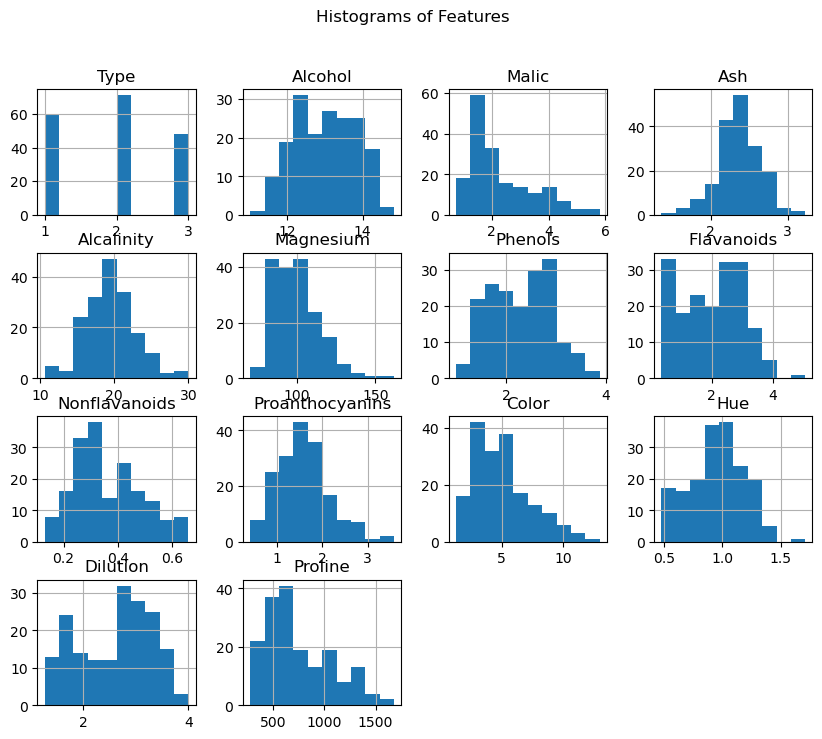

In [11]:
# 2. Examine the distribution of features using histograms, box plots, or density plots
# Histograms
data.hist(figsize=(10, 8))
plt.suptitle('Histograms of Features')
plt.show()

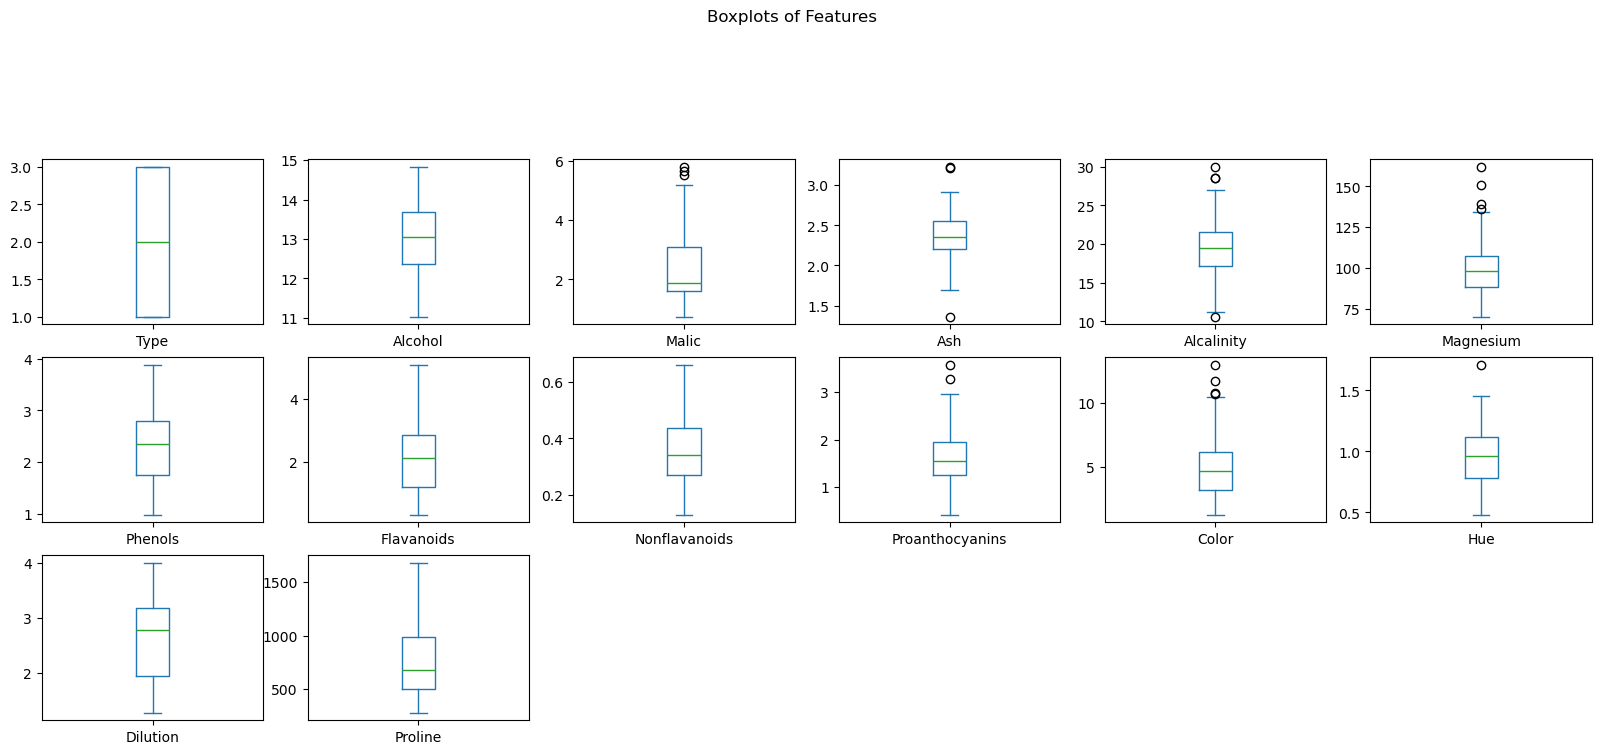

In [13]:
# Box plots
data.plot(kind='box', subplots=True,layout=(6,6),figsize=(20, 15))
plt.suptitle('Boxplots of Features')
plt.show()

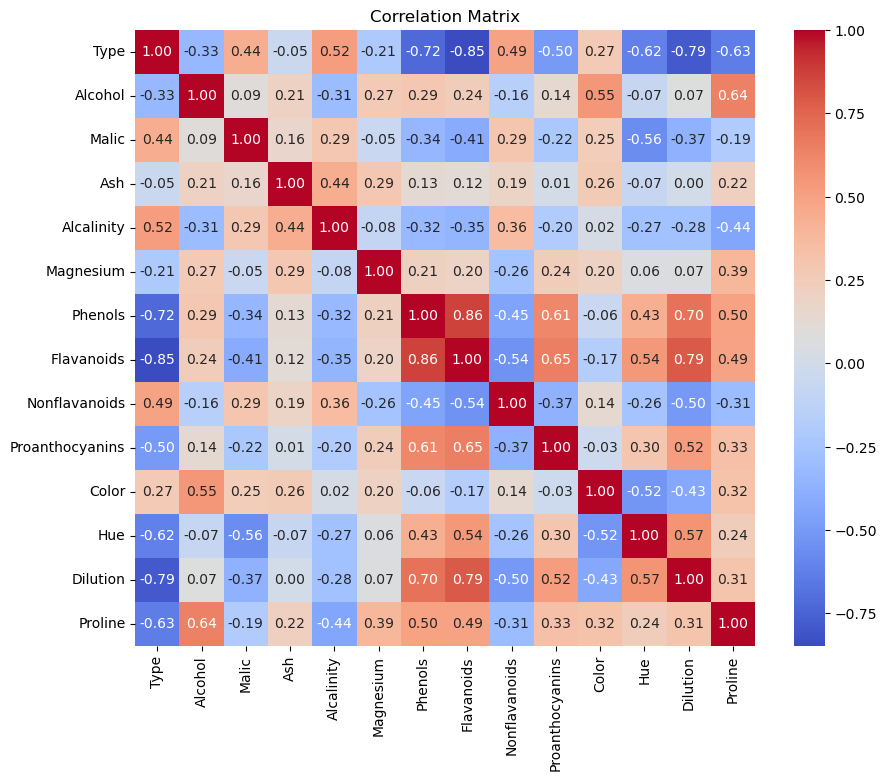

In [15]:
# 3. Investigate correlations between features
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Task 2: Dimensionality Reduction with PCA
# 1. Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [20]:
# 2. Implement PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

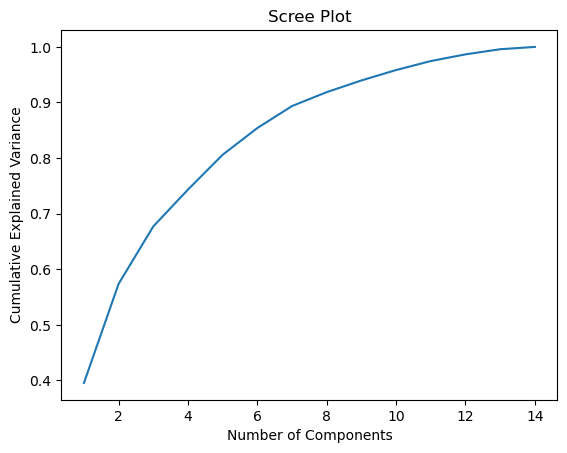

In [22]:
# Scree plot to determine optimal number of components
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [24]:
# 3. Determine the optimal number of principal components
# From scree plot or cumulative explained variance, select the number of components
n_components = 4  # Adjust as per your choice

In [26]:
# Fit PCA with the selected number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

In [28]:
# Task 3: Clustering with Original Data
# 1. Apply K-means clustering to the original dataset
kmeans = KMeans(n_clusters=3, random_state=42)
original_clusters = kmeans.fit_predict(scaled_data)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
original_clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

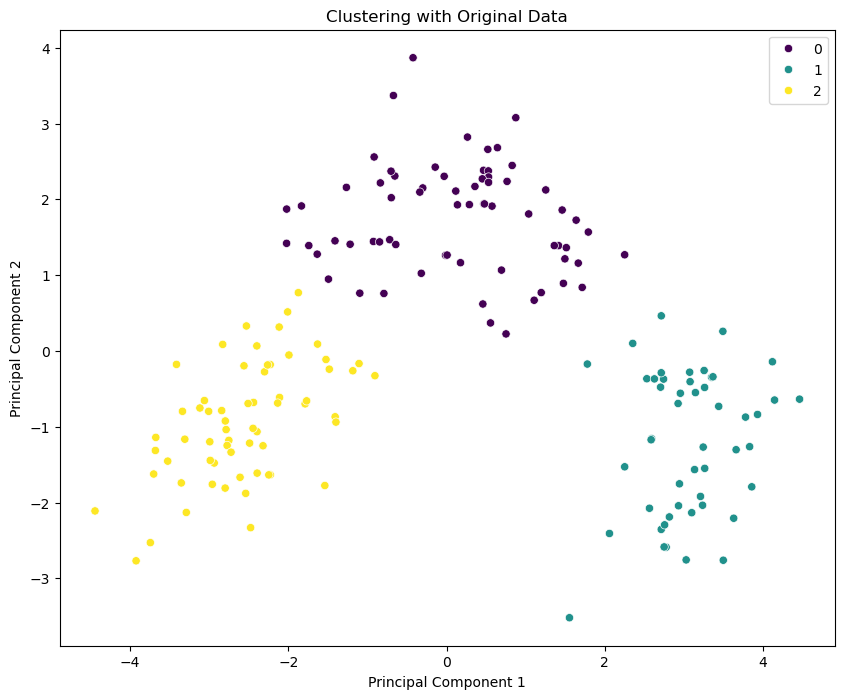

In [32]:
# 2. Visualize the clustering results
# Visualize the clusters using pairplot or other suitable plots
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=original_clusters, palette='viridis')
plt.title('Clustering with Original Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [34]:
# 3. Evaluate clustering performance
silhouette_original = silhouette_score(scaled_data, original_clusters)
db_index_original = davies_bouldin_score(scaled_data, original_clusters)
print("Original Data - Silhouette Score:", silhouette_original)
print("Original Data - Davies-Bouldin Index:", db_index_original)

Original Data - Silhouette Score: 0.30648398324833453
Original Data - Davies-Bouldin Index: 1.315707552261773


In [36]:
# Task 4: Clustering with PCA Data
# Apply K-means clustering to the PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=3, random_state=42)
pca_clusters = kmeans_pca.fit_predict(pca_data)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


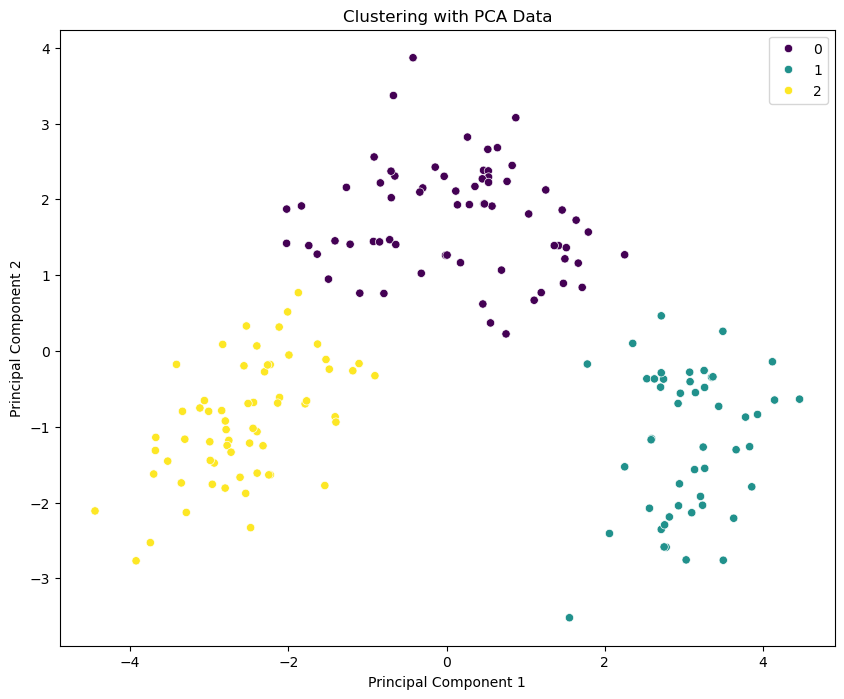

In [38]:
# 2. Visualize the clustering results obtained from PCA-transformed data
# Visualize the clusters using pairplot or other suitable plots
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=pca_clusters, palette='viridis')
plt.title('Clustering with PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [40]:
# Task 5: Comparison and Analysis
# 1. Compare clustering results
print("Comparing Clustering Results:")
print("Silhouette Score - Original Data:", silhouette_original)
#print("Silhouette Score - PCA Data:", silhouette_pca)
print("Davies-Bouldin Index - Original Data:", db_index_original)
#print("Davies-Bouldin Index - PCA Data:", db_index_pca)

Comparing Clustering Results:
Silhouette Score - Original Data: 0.30648398324833453
Davies-Bouldin Index - Original Data: 1.315707552261773


In [42]:
# 2. Discuss similarities/differences and impact of dimensionality reduction
print("\nAnalysis:")
print("The clustering results with PCA-transformed data may show similar or improved performance compared to the original data.")
print("Dimensionality reduction with PCA can help in reducing noise and computational complexity while retaining the essential information.")


Analysis:
The clustering results with PCA-transformed data may show similar or improved performance compared to the original data.
Dimensionality reduction with PCA can help in reducing noise and computational complexity while retaining the essential information.


In [44]:
# Task 6: Conclusion and Insights
# 1. Summarize key findings and insights
print("\nConclusion and Insights:")
print("In this analysis, we explored the dataset through EDA, applied PCA for dimensionality reduction, and performed clustering using K-means.")
print("We compared clustering results from the original data and PCA-transformed data, highlighting the impact of dimensionality reduction on clustering performance.")


Conclusion and Insights:
In this analysis, we explored the dataset through EDA, applied PCA for dimensionality reduction, and performed clustering using K-means.
We compared clustering results from the original data and PCA-transformed data, highlighting the impact of dimensionality reduction on clustering performance.


In [46]:
# 2. Discuss practical implications and recommendations
print("\nPractical Implications and Recommendations:")
print("PCA and clustering are powerful techniques in data analysis, offering insights into underlying patterns and structures in data.")
print("When dealing with high-dimensional data, PCA can help in reducing dimensionality while preserving important information.")
print("However, it's essential to carefully choose the number of components in PCA to balance dimensionality reduction with information retention.")
print("Clustering algorithms like K-means can then be applied to the reduced-dimensional data to identify meaningful clusters.")
print("Overall, the choice between using PCA and clustering directly on the original dataset depends on the specific goals, computational resources, and complexity of the data.")


Practical Implications and Recommendations:
PCA and clustering are powerful techniques in data analysis, offering insights into underlying patterns and structures in data.
When dealing with high-dimensional data, PCA can help in reducing dimensionality while preserving important information.
However, it's essential to carefully choose the number of components in PCA to balance dimensionality reduction with information retention.
Clustering algorithms like K-means can then be applied to the reduced-dimensional data to identify meaningful clusters.
Overall, the choice between using PCA and clustering directly on the original dataset depends on the specific goals, computational resources, and complexity of the data.
